# Hopfield Recurrent Networks 

In this document I will show how a hopfield recurrent network works. We will build it's algorithm from scratch. First we'll create a hello world example, after which we'll create a method that will use these networks on simple images.

### A quick demo 

In [235]:
import numpy as np
import os

In [236]:
inputs = [[1,-1,1,-1,1,-1],[-1,1,-1,1,-1,1]]

In [237]:
def learn(learn_data):
    k = len(learn_data[0])
    hopfield = np.zeros([k,k])
    for in_data in learn_data: 
        np_arr = np.matrix(in_data)
        lesson = np_arr.T*np_arr
        np.fill_diagonal(lesson, 0)
        hopfield = hopfield + lesson
    return hopfield

The learn function takes arrays of input and turns them into a corresponding hopfield matrix.

In [238]:
hopfield_matrix = learn(inputs)
print(hopfield_matrix)

[[ 0. -2.  2. -2.  2. -2.]
 [-2.  0. -2.  2. -2.  2.]
 [ 2. -2.  0. -2.  2. -2.]
 [-2.  2. -2.  0. -2.  2.]
 [ 2. -2.  2. -2.  0. -2.]
 [-2.  2. -2.  2. -2.  0.]]


The matrix corresponds with the following graph. 

![](http://i.imgur.com/xKWDnW1.png)

Now we only need to normalise the resulting array. 

In [239]:
def normalize(res):
    res[res > 0] = 1
    res[res < 0] = -1
    return res

res = hopfield_matrix * np.matrix([1,1,1,1,-1,1]).T
normalize(res)

matrix([[-1.],
        [ 1.],
        [-1.],
        [ 1.],
        [-1.],
        [ 1.]])

The basic example seems to be working. Let's now learn such a network on some images with digits. 

## Now to do this funky shizzle with digits

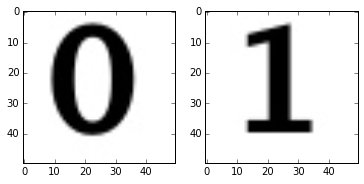

In [242]:
import matplotlib.pyplot as plt
%matplotlib inline  
import cv2

fig, (ax1, ax2) = plt.subplots(1,2)
img = cv2.imread(os.getcwd() + '/hamilton_images/0.jpg')
ax1.imshow(img)

img = cv2.imread(os.getcwd() + '/hamilton_images/1.jpg')
ax2.imshow(img)

These images will serve us as memories, not labels. This makes a hopfield neural network different from classification or clustering methods. We are doing neither, but something very similar. Let's try and get our hamilton network to learn the patterns from the images. 

We will redefine the `learn` method to work for images now. 

In [253]:
def learn(learn_data):
    k = len(learn_data[0])
    hamilton = np.zeros([k,k])
    for in_data in learn_data:
        np_arr = np.matrix(in_data)
        lesson = np_arr*np_arr.T
        np.fill_diagonal(lesson, 0)
        hamilton = hamilton + lesson
    return hamilton

inputs = [] 
for i in ['0', '1']:
    img = cv2.imread(os.getcwd() + '/hamilton_images/' + str(i) + '.jpg')
    an_input = normalize(np.sum(img, axis=2) - 766/2.0)
    an_input.resize((50*50,1))
    inputs.append(list(an_input))
    
hamilton = learn(inputs)

This learning might take a while. It is interesting to see the hamiltonian matrix. Certain regions in the image don't matter in distringuishing the images. 

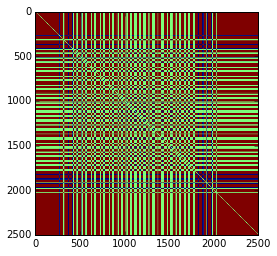

In [254]:
plt.imshow(hamilton)

Now we'll creata a method that can take a noisy image and it will try to find the right memory. 

In [313]:
def network_output(problem):
    an_input = normalize(np.sum(problem, axis=2) - 766/2.0)
    an_input.resize((problem.shape[0]*problem.shape[1],1))
    output = hamilton * an_input
    output.resize(problem.shape[0],problem.shape[1])

    pltr = np.zeros(img.shape) 
    for i in range(pltr.shape[0]):
        for j in range(pltr.shape[1]):
            for k in range(pltr.shape[2]):
                pltr[i,j,k] = output[i,j]
                
    return normalize(pltr)

def recurse(f, i, n):
    if n == 1: 
        return f(i)
    return f(recurse(f, i, n - 1))

Note that I am normalizing the network output to force pixel to either be black or white. Now let's try out our method on a few images. 

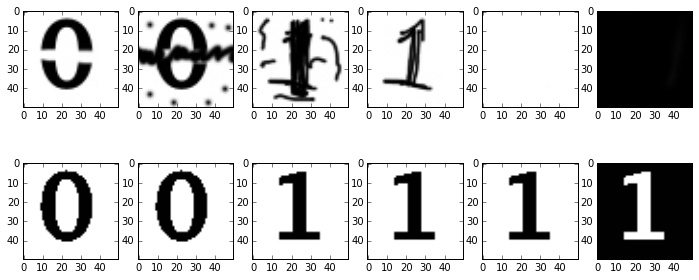

In [315]:
fig, axis = plt.subplots(2,6)
fig.set_size_inches(12,5)
for i, problem in enumerate(['01', '02', '11', '12', 'n1', 'n2']):
    problem = cv2.imread(os.getcwd() + '/hamilton_images/' + problem + '.jpg')
    axis[0][i].imshow(problem)
    axis[1][i].imshow(network_output(problem))

The first four images behave just as expected! 

The last two images might seem counter intuitive. The 5th image contains a lot of whitespace and the original 1 image contains more whitespace than the zero. So it might feel likely that the 5th image is a one. But then why is the 6th image also a one? 

It's because the hopfield network doesn't care about a pixel being black or white, it only cares about the correlation between pixels. This means that all black pixel are the same as all input pixels. This may give unexpected side effects but this is not unwanted behavior per se. 

Hopfield networks are fun. They offer an alternative way to think about neural networks and give insight in why having recurrence in such a network can be a good thing. 